## Dashboard 

In [21]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [4]:
df = pd.read_csv("../data/coches_segunda_mano-18-02-2025_limpio.csv")

## Relación de variables con target precio ( incluidos outliers)


In [13]:
columnas_categoricas = ['distintivo_ambiental', 'garantia', 'carroceria', 'plazas', 'puertas','vendedor_profesional']
def formatear_texto(columna):
    return columna.replace('_', ' ').title()

In [15]:
columnas_numericas = []

for columna in df.columns:
    if (df[columna].dtype in [np.float64, np.int64]) and (columna != 'referencia'):
        columnas_numericas.append(columna)

columnas_numericas

['kilometraje',
 'garantia',
 'plazas',
 'potencia',
 'puertas',
 'precio',
 'consumo_medio',
 'mes_matricula',
 'anio_matricula']

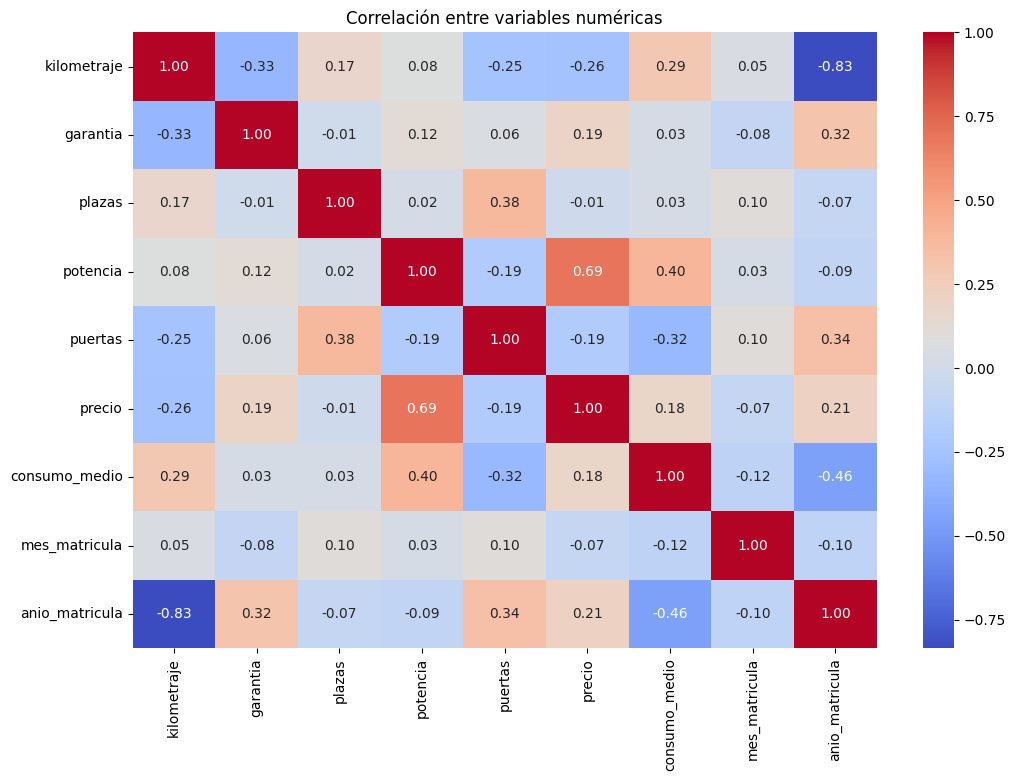

In [ ]:
correlacion = df[columnas_numericas].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlación entre variables numéricas')
plt.show()

In [14]:
for columna in columnas_categoricas:
    fig = px.box(df, x=columna, y='precio', 
                 title=f'Distribución de precios por {columna}',
                 labels={columna: formatear_texto(columna), 'precio': 'Precio en Euros'})

    fig.update_layout(xaxis_tickangle=-90, width=900, height=500)  
    fig.show()


In [ ]:
fig1 = px.box(df, x='marca_sola', y='precio', title='Distribución de precios por Marca',
              labels={'marca_sola': 'Marca', 'precio': 'Precio en Euros'})
fig1.update_layout(xaxis_tickangle=-90, height=600, width=1000)
fig1.show()

fig2 = px.box(df, x='combustible', y='precio', title='Distribución de precios por Tipo de Combustible',
              labels={'combustible': 'Tipo de Combustible', 'precio': 'Precio en Euros'})
fig2.update_layout(xaxis_tickangle=-90, height=600, width=800)
fig2.show()

fig3 = px.box(df, x='color', y='precio', title='Distribución de precios por Color',
              labels={'color': 'Color', 'precio': 'Precio en Euros'})
fig3.update_layout(xaxis_tickangle=-90, height=600, width=800)
fig3.show()

In [ ]:
fig1 = px.scatter(df, x='kilometraje', y='precio', title='Relación entre Kilometraje y Precio',
                  labels={'kilometraje': 'Kilometraje', 'precio': 'Precio en Euros'})
fig1.update_layout(height=600, width=800)
fig1.show()

fig2 = px.scatter(df, x='potencia', y='precio', title='Relación entre Potencia y Precio',
                  labels={'potencia': 'Potencia', 'precio': 'Precio en Euros'})
fig2.update_layout(height=600, width=800)
fig2.show()

## Precio por Comunidad,Provincia y Código Postal

In [ ]:
fig_comunidad = px.scatter(df, x='comunidad', y='precio', 
                           title='Relación entre comunidad y precio',
                           labels={'comunidad': 'Comunidad', 'precio': 'Precio en Euros'})
fig_comunidad.update_xaxes(tickangle=90)  # Rotar etiquetas en el eje X
fig_comunidad.show()

fig_provincia = px.scatter(df, x='provincia', y='precio', 
                           title='Relación entre provincia y precio',
                           labels={'provincia': 'Provincia', 'precio': 'Precio en Euros'})
fig_provincia.update_xaxes(tickangle=90)  # Rotar etiquetas en el eje X
fig_provincia.show()

# fig_codigo_postal = px.scatter(df, x='codigo_postal', y='precio', 
#                                title='Relación entre código postal y precio',
#                                labels={'codigo_postal': 'Código Postal', 'precio': 'Precio en Euros'})
# fig_codigo_postal.update_xaxes(tickangle=90)  # Rotar etiquetas en el eje X
# fig_codigo_postal.show()

## Evolución de precio según su antigüedad

In [ ]:
df_promedio = df.groupby('anio_matricula')['precio'].mean().reset_index()

fig_anio_matricula = px.line(df_promedio, x='anio_matricula', y='precio', 
                             title='Evolución del precio medio según el año de matriculación',
                             labels={'anio_matricula': 'Año de Matriculación', 'precio': 'Precio Medio en Euros'})
fig_anio_matricula.update_layout(
    xaxis_title="Año de Matriculación", 
    yaxis_title="Precio Medio en Euros"
)
fig_anio_matricula.show()

In [ ]:
df_consumo = df[df['consumo_medio'] > 0]

fig_consumo = px.box(df_consumo, x='marca_sola', y='consumo_medio', 
                     title='Distribución del Consumo Medio por Marca',
                     labels={'marca_sola': 'Marca', 'consumo_medio': 'Consumo Medio (L/100km)'},
                     color='marca_sola')

fig_consumo.update_layout(
    xaxis_title="Marca",
    yaxis_title="Consumo Medio (L/100km)",
    xaxis_tickangle=-90 
)

fig_consumo.show()

In [30]:
fig_consumo_combustible = px.box(df_consumo, x='combustible', y='consumo_medio',
                                  title='Distribución del Consumo Medio por tipo de Combustible',
                                  labels={'combustible': 'Combustible', 'consumo_medio': 'Consumo Medio (L/100km)'})

fig_consumo_combustible.update_layout(
    xaxis_title="Combustible",
    yaxis_title="Consumo Medio (L/100km)",
    xaxis_tickangle=-90  
)

fig_consumo_combustible.show()

## Outliers

La distribución de precios NO es normal (p <= 0.05), usaremos IQR (Tukey).


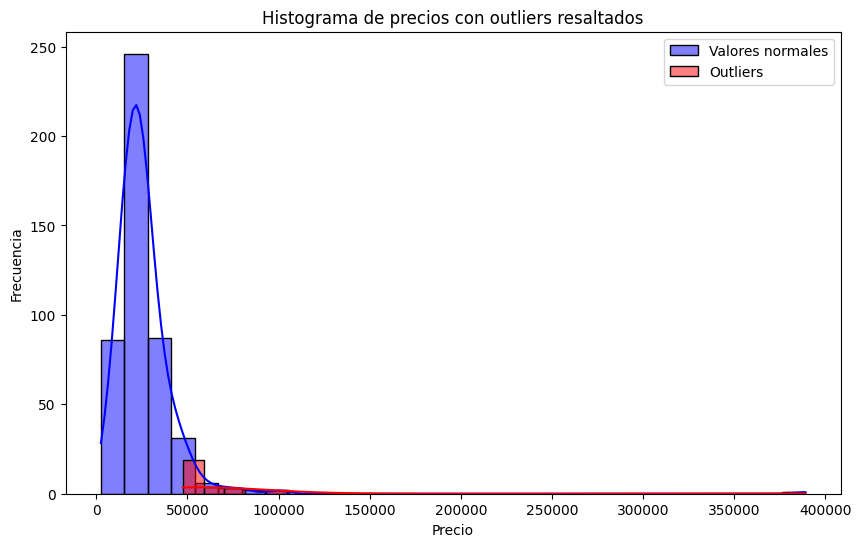

In [32]:
from scipy.stats import normaltest, zscore

columna = "precio"

stat, p_value = normaltest(df[columna].dropna())  

# Si p > 0.05 tiene distribucion normal y usamos Z-Score, si no usamos Tukey
if p_value > 0.05:
    print("La distribución de precios es normal (p > 0.05), usaremos Z-Score.")
    z = 3  
    z_scores = zscore(df[columna].dropna())
    outliers = df[np.abs(z_scores) > z]
else:
    print("La distribución de precios NO es normal (p <= 0.05), usaremos IQR (Tukey).")
    q1 = df[columna].quantile(0.25)
    q3 = df[columna].quantile(0.75)
    ric = q3 - q1
    lim_izq= q1 - 1.5 * ric
    lim_der = q3 + 1.5 * ric
    outliers = df[(df[columna] < lim_izq) | (df[columna] > lim_der)]

plt.figure(figsize=(10, 6))
sns.histplot(df[columna], bins=30, kde=True, color="blue", label="Valores normales")
sns.histplot(outliers[columna], bins=30, kde=True, color="red", label="Outliers")

plt.title("Histograma de precios con outliers resaltados")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

## Sin outliers

tengo que hacer un filtro de outliers y graficar

## Mapa Coropleth de Coches por Comunidad Autónoma, Provincia y Código Postal

In [33]:
df_agrupado1 = df.groupby("comunidad").agg(
    cantidad_coches=("precio", "count"),
    precio_medio=("precio", "mean")
).reset_index()
df_agrupado1['comunidad'] = df_agrupado1['comunidad'].replace({
    "Comunidad Valenciana": "Comunitat Valenciana",
    "Navarra": "Comunidad Foral de Navarra"
})
coordenadas_dict = {
    'Andalucía': [-6.933198279, 38.20515158308281],
    'Aragón': [41.146848953065074, -2.051693319],
    'Castilla y León': [-6.983543504, 41.971848179061865],
    'Castilla-La Mancha': [-5.041794734, 38.728673005078946],
    'Cataluña': [0.514946321, 40.52525092806802],
    'Comunitat Valenciana': [-0.762566145, 37.85512318608558],
    'Comunidad de Madrid': [-3.543904587, 41.165844754065],
    'Extremadura': [-6.931561659, 38.20820979208279],
    'Galicia': [-7.036202862, 43.54518304705791],
    'La Rioja': [42.63838404505985, -2.858067449],
    'Comunidad Foral de Navarra': [-2.415665965, 42.490538486060245],
    'País Vasco': [-3.415445197, 43.13413541505866],
    'Región de Murcia': [-1.545845412, 37.4076178540893]
}

df_agrupado1['coordenadas_comunidad'] = df_agrupado1['comunidad'].map(coordenadas_dict)

df_agrupado1['precio_medio'] = df_agrupado1['precio_medio'].apply(lambda x: round(x,2))

In [34]:
import json

geojson_url_comunidades = "../src/geojson/comunidades_espana.geojson"

with open(geojson_url_comunidades) as f:
    geojson_data1 = json.load(f)

comunidades_geojson = pd.DataFrame([{
    'comunidad': feature['properties']['acom_name'],  
    'geometry': feature['geometry'] 
} for feature in geojson_data1['features']])

df_comunidades_coches = comunidades_geojson.merge(df_agrupado1[['comunidad', 'cantidad_coches','precio_medio']], on='comunidad', how='left')

df_comunidades_coches['cantidad_coches'] = df_comunidades_coches['cantidad_coches'].fillna(0).astype(int)
df_comunidades_coches['precio_medio'] = df_comunidades_coches['precio_medio'].fillna(0).astype(int)

fig = px.choropleth_mapbox(
    df_comunidades_coches,
    geojson=geojson_url_comunidades,               
    locations='comunidad',                  
    featureidkey="properties.acom_name",    
    color='cantidad_coches',                
    color_continuous_scale="reds",          
    mapbox_style="carto-positron",          
    center={"lat": 36.2, "lon": -7.3},  
    zoom=4,                         
    title="Densidad de Coches en Venta y Precio Medio por Comunidad Autónoma",
    hover_data={'comunidad': False, 'cantidad_coches': False,'precio_medio': False},  
    custom_data=['comunidad', 'cantidad_coches', 'precio_medio'],  
)

fig.update_layout(
    width=1180,  
    height=1024,  
    autosize=False,
    coloraxis_colorbar_title="Cantidad de Coches")  

fig.update_traces(
    hovertemplate="<b>Comunidad</b>: %{customdata[0]}<br><b>Cantidad de Coches</b>: %{customdata[1]}<br><b>Precio medio de Coches en la Comunidad</b>: €%{customdata[2]}"
)
fig.show()

C:\Users\Santiago Courel\AppData\Local\Temp\ipykernel_16412\1524092308.py:18: DeprecationWarning:

*choropleth_mapbox* is deprecated! Use *choropleth_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [35]:
df_agrupado2 = df.groupby('provincia').agg(
    cantidad_coches=('provincia', 'count'),  
    precio_medio=('precio', 'mean')         
).reset_index()
df_agrupado2['precio_medio'] = df_agrupado2['precio_medio'].apply(lambda x: round(x,2))
coordenadas_provincias = {
    "Álava": (42.8467, -2.6727),
    "Albacete": (38.9943, -1.8585),
    "Alicante": (38.3452, -0.4810),
    "Almería": (36.8402, -2.4679),
    "Asturias": (43.3614, -5.8593),
    "Ávila": (40.6566, -4.7003),
    "Badajoz": (38.8794, -6.9707),
    "Barcelona": (41.3851, 2.1734),
    "Burgos": (42.3439, -3.6969),
    "Cáceres": (39.4763, -6.3724),
    "Cádiz": (36.5298, -6.2923),
    "Cantabria": (43.1828, -3.9878),
    "Castellón": (39.9864, -0.0513),
    "Ciudad Real": (38.9863, -3.9291),
    "Córdoba": (37.8882, -4.7794),
    "Cuenca": (40.0718, -2.1316),
    "Girona": (41.9794, 2.8214),
    "Granada": (37.1773, -3.5986),
    "Guadalajara": (40.6332, -3.1676),
    "Guipúzcoa": (43.3128, -1.9746),
    "Huelva": (37.2614, -6.9447),
    "Huesca": (42.1362, -0.4087),
    "Illes Balears": (39.6953, 3.0176),
    "Jaén": (37.7796, -3.7849),
    "La Coruña": (43.3623, -8.4115),
    "La Rioja": (42.2871, -2.5396),
    "Las Palmas": (28.1235, -15.4363),
    "León": (42.5987, -5.5671),
    "Lleida": (41.6176, 0.6200),
    "Lugo": (43.0122, -7.5589),
    "Madrid": (40.4168, -3.7038),
    "Málaga": (36.7213, -4.4213),
    "Murcia": (37.9922, -1.1307),
    "Navarra": (42.6954, -1.6761),
    "Orense": (42.3366, -7.8631),
    "Palencia": (42.0097, -4.5282),
    "Pontevedra": (42.4304, -8.6441),
    "Salamanca": (40.9701, -5.6635),
    "Santa Cruz de Tenerife": (28.4636, -16.2518),
    "Segovia": (40.9429, -4.1088),
    "Sevilla": (37.3886, -5.9823),
    "Soria": (41.7636, -2.4646),
    "Tarragona": (41.1189, 1.2445),
    "Teruel": (40.3456, -1.1064),
    "Toledo": (39.8628, -4.0273),
    "Valencia": (39.4699, -0.3763),
    "Valladolid": (41.6523, -4.7245),
    "Vizcaya": (43.2630, -2.9340),
    "Zamora": (41.5033, -5.7434),
    "Zaragoza": (41.6488, -0.8891),
    "Ceuta": (35.8894, -5.3213),
    "Melilla": (35.2923, -2.9381)
}
df_agrupado2['coordenadas_provincias'] = df_agrupado2['provincia'].map(coordenadas_provincias)
correccion_nombres_df = {
    "Alicante": "Alacant/Alicante",
    "Vizcaya": "Bizkaia/Vizcaya",
    "La Coruña": "A Coruña",
    "Castellón": "Castelló/Castellón",
    "Valencia": "València/Valencia",
    "Álava": "Araba/Álava",
    "Guipúzcoa": "Gipuzkoa/Guipúzcoa",
    "Orense": "Ourense",
    "Baleares": "Illes Balears",
    "Santa Cruz de Tenerife": "Santa Cruz De Tenerife"
}
df_agrupado2['provincia'] = df_agrupado2['provincia'].replace(correccion_nombres_df)

In [36]:
geojson_url_provincias = '../src/geojson/provincias_espana.geojson'

with open(geojson_url_provincias, encoding="utf-8") as f:
    geojson_data2 = json.load(f)

provincias_geojson = pd.DataFrame([{
    'provincia': feature['properties']['name'],  
    'geometry': feature['geometry']
} for feature in geojson_data2['features']])

df_provincias_coches_precio = provincias_geojson.merge(df_agrupado2, on='provincia', how='left')

df_provincias_coches_precio['cantidad_coches'] = df_provincias_coches_precio['cantidad_coches'].fillna(0).astype(int)
df_provincias_coches_precio['precio_medio'] = df_provincias_coches_precio['precio_medio'].fillna(0)

fig = px.choropleth_mapbox(
    df_provincias_coches_precio,
    geojson=geojson_url_provincias,
    locations='provincia',                
    featureidkey="properties.name",  
    color='cantidad_coches',              
    color_continuous_scale="reds",        
    mapbox_style="carto-positron",        
    center={"lat": 40.416775, "lon": -3.703790},  
    zoom=4,                             
    title="Cantidad de Coches en Venta por Provincia",
    hover_data={'provincia': False, 'precio_medio': False},  
    custom_data=['provincia', 'cantidad_coches', 'precio_medio'],  
)

fig.update_traces(
    hovertemplate="<b>Provincia</b>: %{customdata[0]}<br><b>Cantidad de Coches</b>: %{customdata[1]}<br><b>Precio Medio</b>: %{customdata[2]:,.2f}€"
)
fig.update_layout(
    width=1180,  
    height=1024,  
    autosize=False,
    coloraxis_colorbar_title="Cantidad de Coches")
fig.show()

C:\Users\Santiago Courel\AppData\Local\Temp\ipykernel_16412\1453437530.py:16: DeprecationWarning:

*choropleth_mapbox* is deprecated! Use *choropleth_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/

